<img src="./img/Logo.jpg" align="right" width="150" /> 

## Medidas Electrónicas 1

# Trabajo Práctico de Laboratorio Nº 4: Osciloscopio (DSO)

### **Curso:** 

* R4052 2023

### **Docentes:**

* Marinsek, Emiliano
* Perdomo, Juan Manuel

### **Nº de Grupo:** 

* 2

###   **Integrantes:**

* Borello, Federico
* Dimaio, Agustin
* Manoukian, Francisco Tomas
* Mella, Camila
* Ronchetti Juan Manuel

# Objetivos

- Entender el funcionamiento del DSO.
- Realizar mediciones de forma práctica y eficaz.
- Conceptualizar la incertidumbre de forma práctica con intervalos
- Entender que algunas incertidumbres pueden ser mayores debido a la falta de información y la ambiguedad de los manuales

# Especificaciones

A continuación se detallan las especificaciones de los instrumentos y componentes utilizados:

#### Especificaciones del osciloscopio GDS-1072A-U:

No se detallan datos para calcular la incertidumbre con la punta X10 en el manual. Se considera que no afecta a la incertidumbre.

- [Manual Osciloscopio GDS-1072A-U ](https://www.tme.eu/Document/03b79ea7165f8a23682789918acc129e/GDS-1000A-U+user+manual+2012%280504%29.pdf) (Especificaciones en pag 141)

Vertical: $\pm (3\% + 0.1[\text{div}] + 1[\text{mV}])$

![specs v](img/image-1.png)

Horizontal: $\pm (0.01\%)$ 

![specs h](img/image.png)

#### Especificaciones del generador de señales Twintex TFG-3205E:

![specs gen](img/image-2.png)

Generador: $\pm (50ppm + 5ppm/3hs)$

#### Especificaciones de los resistores: 
* Tolerancia: $5\%$ 

# Desarrollo



## Ensayo 1

En este ensayo, se buscó medir la impedancia de un dipolo paralelo conformado por un capacitor y una resistencia
cuya fase rondaría entre 25º y 40º a una frecuencia de 1kHz. Para ello se midió la tensión y la corriente del dipolo utilizando un DSO y una resistencia en serie para medir la tensión sin desfasaje y la corriente.


#### Datos

$$ R_1  = 3.3 [k\Omega] \pm 5 \% $$

$$ R_2  = 1 [k\Omega] \pm 5 \% $$

$$ C = 22 [nF] \pm 5 \% $$

$$ V = 3 [V] \quad \text{a} \; 1[kHz] $$


#### Formulas y Procedimiento

El cálculo de la fase se realiza con la siguiente cuenta:

$$\phi(x) = \cfrac{\Delta t ⋅ 360}{T}$$

El modulo de la impedancia se obtiene con la corriente:

$$ I_{\text{RMS}} = \cfrac{V_{R_\text{RMS}}}{R_2} $$

Y se halla el modulo de la impedancia del dipolo con:

$$ |Z| = \cfrac{V_{Z_\text{RMS}}}{I_{\text{RMS}}}$$

Por lo tanto, la fase tendra una incertidumbre que se deriva de las especificaciones del DSO. Y el generador de señales. 
Y luego se calcula la corriente, expandiendo la incertidumbre de la resistencia y la medición de tensión del DSO.
Por último, se halla la incertidumbre de Z expandiendo la incertidumbre de la corriente y de la tensión medida por el DSO.

#### Circuito

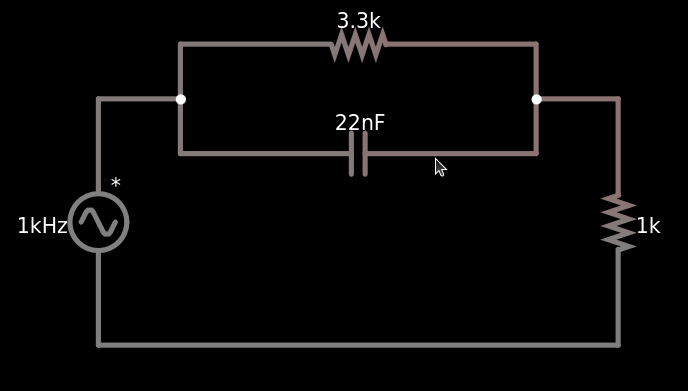

Se utiliza un capacitor de 22nF y un resistor de 3k3 ohms. [Simulación](https://tinyurl.com/ynqsfqkn)

Siendo el ángulo igual a &rarr; $\phi = - \arctan ( \omega \, C \, R )$ &rarr; $\approx -25^\circ$

Se tiene una fase muy proxima a la cota inferior, se debe a los valores de los componentes a disposición al momento de realizar las mediciones.


#### Medicion Vx y Vy
<img src="./IMGS_TP4_OSC/DS0003.BMP"  width=450 /> 

#### Tiempo Vx y Vy
<img src="./IMGS_TP4_OSC/DS0001.BMP"  width=450 /> 



In [166]:
import numpy as np
import sympy as sp
from IPython.display import display, Math

def uBr_DSO_Vert(v, sf) -> float:
    uB = (3/100 * v + 0.1 * sf + 1e-3)/np.sqrt(3)
    return uB/v

def uBr_DSO_Hori(t) -> float:
    uB = (0.01/100 * t)/np.sqrt(3)
    return uB/t

def uBr_GEN() -> float: 
    # se tiene en cuenta 1 hora de encendido el generador
    return (50e-6 + 5e-6 * (1/3))/np.sqrt(3)

In [167]:
t = 64e-6
T = 1 / 1e3 # frecuencia 1khz

phi = t * 360 / T

uBr_t = uBr_DSO_Hori(t)
uBr_T = uBr_GEN()

ur_phi = np.sqrt(uBr_t**2 + uBr_T**2)

u_phi = phi * ur_phi
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} \phi = \cfrac{{t \, . \, 360}}{{T}} \quad || \quad \bar{{\phi}} = {round(phi, 2)}{{^\circ}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{\phi}}) = {round(u_phi, 4)}{{^\circ}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{\phi}}) = u_C(\bar{{\phi}}) \; k_{{95\%}} \Rightarrow  {round(u_phi * k, 4)}{{^\circ}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{\phi}} = {format(phi, ".3f")} \pm {round(u_phi * 2, 4)}{{^\circ}} \nonumber \end{{equation}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se observa que la fase queda afuera por muy poco del rango solicitado (25º a 40º), pero el error puede atribuirse al capacitor utilizado y su dispersion.

In [168]:
V_R = 1.08
R = 1e3

I = (V_R / (2 * np.sqrt(2))) / R

uBr_V = uBr_DSO_Vert(v= V_R, sf=200e-3)
uBr_R = 5/100 * 1/np.sqrt(3) * 1/R

ur_I = np.sqrt(uBr_R**2 + uBr_V**2)

u_I = I * ur_I
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} I = \cfrac{{V_{{R, \, RMS}}}}{{R}} \quad || \quad \bar{{I}} = {round(I, 7)}{{[A]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{I}}) = {round(u_I, 7)}{{[A]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{I}}) = u_C(\bar{{I}}) \; k_{{95\%}} \Rightarrow  {round(u_I * k, 8)}{{[A]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{I}} = {format(I * 1e6, ".0f")} \pm {format(u_I * k * 1e6, ".0f")}{{[\mu A]}} \nonumber \end{{equation}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [169]:
V_Z = 3.96

# Se calcula el valor RMS con V_Z y el valor de I ya es RMS
Z = (V_Z / (2 * np.sqrt(2))) / I

uBr_V_Z = uBr_DSO_Vert(v= V_Z, sf=1)

ur_Z = np.sqrt(uBr_V_Z**2 + ur_I**2)

u_Z = Z * ur_Z
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} | Z | = \cfrac{{V_{{Z, \, RMS}}}}{{I}} \quad || \quad \bar{{Z}} = {round(Z, 2)}{{[\Omega]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{|Z|}}) = {round(u_Z, 2)}{{[\Omega]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{|Z|}}) = u_C(\bar{{|Z|}}) \; k_{{95\%}} \Rightarrow  {round(u_Z * k, 2)}{{[\Omega]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{|Z|}} = {round(Z)} \pm {round(u_Z * k)}{{[\Omega]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [183]:
display(Math(fr'\begin{{equation}} {{Z}} = {round(Z)} \pm {round(u_Z * k)}{{[\Omega]}}  \; \angle \, {format(-phi, ".3f")} \pm {round(u_phi * 2, 4)}{{^\circ}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

El ángulo es negativo por ser un circuito RC.

## Ensayo 2

En este ensayo, se utilizó un circuito conformado por un relé, un switch y un diodo removible para realizar las siguientes mediciones:
* Tiempo de apertura y tiempo de cierre (con y sin diodo de protección)
* Sobre-tensión en la llave en el momento de apertura (con y sin diodo de protección)

#### Tiempo de apertura sin diodo

En la primera imágen se realiza una medición representativa del fenómeno "[flyback](https://en.wikipedia.org/wiki/Flyback_diode)", el cual hace referencia a picos de tensión debido a un inductor.

<img src="./IMGS_TP4_OSC/DS0004.BMP"  width=450 /> 

In [171]:
t_e2_1 = 6.120e-3

ur_t_e2_1 = uBr_DSO_Hori(t_e2_1)

u_t_e2_1 = ur_t_e2_1 * t_e2_1
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} \Delta t = {format(t_e2_1 * 1e3, ".4f")}{{[ms]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{\Delta t}}) = {round(u_t_e2_1 * 1e3, 5)}{{[ms]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{\Delta t}}) = u_C(\bar{{\Delta t}}) \; k_{{95\%}} \Rightarrow {round(u_t_e2_1 * k * 1e3, 5)}{{[ms]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{\Delta t}} = {format(t_e2_1 * 1e3, ".4f")} \pm {round(u_t_e2_1 * k * 1e3, 4)}{{[ms]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Sobretensión con diodo

Al conectar un diodo, se suprime la sobretensión. Esta imagen es demostrativa del efecto. A continuación se realizan las mediciones pertinentes con sus respectivas incertidumbres.

<img src="./IMGS_TP4_OSC/DS0005.BMP"  width=450 /> 

In [172]:
v_e2_1 = 16.2

ur_v_e2_1 = uBr_DSO_Vert(v_e2_1, 2)

u_v_e2_1 = ur_v_e2_1 * v_e2_1
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} V_{{\text{{peak}}}} = {format(v_e2_1, ".1f")}{{[V]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{V_{{\text{{peak}}}}}}) = {round(u_v_e2_1 , 4)}{{[V]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{V_{{\text{{peak}}}}}}) = u_C(\bar{{V_{{\text{{peak}}}}}}) \; k_{{95\%}} \Rightarrow {round(u_v_e2_1 * k, 4)}{{[V]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} V_{{\text{{peak}}}} = {format(v_e2_1, ".2f")} \pm {round(u_v_e2_1 * k, 2)}{{[V]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Sobtretension sin diodo - Punta X10

<img src="./IMGS_TP4_OSC/DS0006.BMP"  width=450 />

In [173]:
v_e2_2 = 332

ur_v_e2_2 = uBr_DSO_Vert(v_e2_2, 50)

u_v_e2_2 = ur_v_e2_2 * v_e2_2
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} V_{{\text{{peak}}}} = {format(v_e2_2, ".1f")}{{[V]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{V_{{\text{{peak}}}}}}) = {round(u_v_e2_2 , 4)}{{[V]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{V_{{\text{{peak}}}}}}) = u_C(\bar{{V_{{\text{{peak}}}}}}) \; k_{{95\%}} \Rightarrow {round(u_v_e2_2 * k, 4)}{{[V]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} V_{{\text{{peak}}}} = {format(v_e2_2, ".2f")} \pm {round(u_v_e2_2 * k, 2)}{{[V]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Overshoot sin diodo - Punta X1 - Full Range

<img src="./IMGS_TP4_OSC/DS0007.BMP"  width=450 /> 

Las siguientes capturas del osciloscopio exponen el efecto que tiene el diodo en la conexión y desconexión del inductor, es decir, el switcheo del releé. El pico de tensión es tan grande que no puede visualizarse bien con la punta X1. Por eso se realizó la anterior medición con la punta X10.
También se podría haber incrementado la escala vertical, pero no se llegaba a observar el momento de switcheo.

In [174]:
v_e2_3 = 63

ur_v_e2_3 = uBr_DSO_Vert(v_e2_3, 10)

u_v_e2_3 = ur_v_e2_3 * v_e2_3
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} V_{{\text{{peak}}}} = {format(v_e2_3, ".1f")}{{[V]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{V_{{\text{{peak}}}}}}) = {round(u_v_e2_3 , 4)}{{[V]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{V_{{\text{{peak}}}}}}) = u_C(\bar{{V_{{\text{{peak}}}}}}) \; k_{{95\%}} \Rightarrow {round(u_v_e2_3 * k, 4)}{{[V]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} V_{{\text{{peak}}}} = {format(v_e2_3, ".0f")} \pm {round(u_v_e2_3 * k)}{{[V]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Tiempo de apertura con diodo

<img src="./IMGS_TP4_OSC/DS0009.BMP"  width=450 />

In [175]:
t_e2_2 = 2.9e-3

ur_t_e2_2 = uBr_DSO_Hori(t_e2_2)

u_t_e2_2 = ur_t_e2_2 * t_e2_2
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} \Delta t = {format(t_e2_2 * 1e3, ".4f")}{{[ms]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{\Delta t}}) = {round(u_t_e2_2 * 1e3, 5)}{{[ms]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{\Delta t}}) = u_C(\bar{{\Delta t}}) \; k_{{95\%}} \Rightarrow {round(u_t_e2_2 * k * 1e3, 5)}{{[ms]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{\Delta t}} = {format(t_e2_2 * 1e3, ".4f")} \pm {round(u_t_e2_2 * k * 1e3, 4)}{{[ms]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Tiempo de cierre con diodo

<img src="./IMGS_TP4_OSC/DS0010.BMP"  width=450 /> 

In [176]:
t_e2_3 = 6.040e-3

ur_t_e2_3 = uBr_DSO_Hori(t_e2_3)

u_t_e2_3 = ur_t_e2_3 * t_e2_3
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} \Delta t = {format(t_e2_3 * 1e3, ".4f")}{{[ms]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{\Delta t}}) = {round(u_t_e2_3 * 1e3, 5)}{{[ms]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{\Delta t}}) = u_C(\bar{{\Delta t}}) \; k_{{95\%}} \Rightarrow {round(u_t_e2_3 * k * 1e3, 5)}{{[ms]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{\Delta t}} = {format(t_e2_3 * 1e3, ".4f")} \pm {round(u_t_e2_3 * k * 1e3, 4)}{{[ms]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Tiempo de cierre sin diodo

<img src="./IMGS_TP4_OSC/DS0011.BMP"  width=450 />

In [177]:
t_e2_4 = 6.240e-3

ur_t_e2_4 = uBr_DSO_Hori(t_e2_4)

u_t_e2_4 = ur_t_e2_2 * t_e2_4
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} \Delta t = {format(t_e2_4 * 1e3, ".4f")}{{[ms]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{\Delta t}}) = {round(u_t_e2_4 * 1e3, 5)}{{[ms]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{\Delta t}}) = u_C(\bar{{\Delta t}}) \; k_{{95\%}} \Rightarrow {round(u_t_e2_4 * k * 1e3, 5)}{{[ms]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{\Delta t}} = {format(t_e2_4 * 1e3, ".4f")} \pm {round(u_t_e2_4 * k * 1e3, 4)}{{[ms]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Tiempo de apertura sin diodo

<img src="./IMGS_TP4_OSC/DS0012.BMP"  width=450 /> 

Se observa que el tiempo de apertura sin diodo difiere groseramente con el tiempo obtenido si se conecta el diodo. El efecto se explica con el comportamiento capacitivo de la juntura PN cuando se lo conecta en "inversa". Esta capacidad añadida, filtra las altas frecuencias, aumentando el risetime.

In [181]:
t_e2_5 = 572e-6

ur_t_e2_5 = uBr_DSO_Hori(t_e2_5)

u_t_e2_5 = ur_t_e2_5 * t_e2_5
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} \Delta t = {format(t_e2_5 * 1e6, ".4f")}{{[\mu s]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{\Delta t}}) = {round(u_t_e2_5 * 1e6, 5)}{{[\mu s]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{\Delta t}}) = u_C(\bar{{\Delta t}}) \; k_{{95\%}} \Rightarrow {round(u_t_e2_5 * k * 1e6, 5)}{{[\mu s]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{\Delta t}} = {format(t_e2_5 * 1e6, ".3f")} \pm {format(u_t_e2_5 * k * 1e6, ".3f")}{{[\mu s]}} \nonumber \end{{equation}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Ensayo 3

En este ensayo, se busco medir el tiempo de establecimiento de un generador de señal rectangular. Se utilizo para ello una señal senoidal de 10 Hz y 4 Vpp.

Se obtuvo el siguiente resultado en el osciloscopio:

#### Fórmulas:

$$t_{ei}^2 = t_{eg}^2 + t_{ec}^2 + t_{etp}^2 + t_{eo}^2$$

$$t_{eo} = \cfrac{0.35}{BW}$$

$$t_{etp} = 2.2 \left(\sum R_i ^{-1} \right)^{-1} \, \sum C_i$$


#### Tiempo de establecimiento indicado:

<img src="./IMGS_TP4_OSC/DS0013.BMP"  width=450 /> 

Se observa un tiempo de establecimiento indicado de $\Delta = 26.80ns$.

Datos requeridos:
- [Manual Osciloscopio GDS-1072A-U ](https://www.tme.eu/Document/03b79ea7165f8a23682789918acc129e/GDS-1000A-U+user+manual+2012%280504%29.pdf) (Especificaciones en pag 141)
- Especificaciones puntas de prueba en pag 144.
- Se desprecia el $t_{ec}^2$ (tiempo de establecimiento del cable). No hay información en el manual.

Modelización:

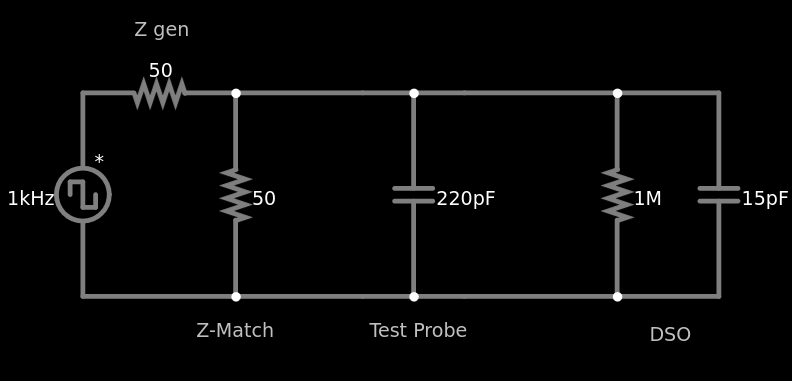

In [179]:
from IPython.display import display, Math
import matplotlib as mpl
to_eng = mpl.ticker.EngFormatter()

c_tp_worst = 220e-12
c_tp_best = 120e-12
t_eo = 5e-9
t_ei = 26.8e-9
t_etp_worst = 2.2 * (2/50+1/1e6)**(-1) * (c_tp_worst + 15e-12)
t_etp_best = 2.2 * (2/50+1/1e6)**(-1) * (c_tp_best + 15e-12)

t_eg_best = (t_ei**2 - t_eo**2 - t_etp_worst**2)**(1/2)
t_eg_worst = (t_ei**2 - t_eo**2 - t_etp_best**2)**(1/2)




display(Math(rf'\textbf{{Tiempo de establecimiento del Generador }} (t_{{eg}}): '))
display(Math(rf'\begin{{equation}} {to_eng(t_eg_best)} \le t_{{eg}} \le {to_eng(t_eg_worst)} \nonumber \end{{equation}} '))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

El tiempo de establecimiento del generador se ecuentra entre 2 valores si se tiene en cuenta la dispersión del capacitor de las puntas de prueba que especifica el manual.

## Ensayo 4

En este ensayo, se buscó a partir de una señal senoidal de 100 kHz y Vpp = 4 V, medir el máximo error de tensión, de forma empírica, que se
puede producir utilizando una punta sin compensar frente a otra compensada.

Se obtuvieron los siguientes resultados en el osciloscopio (canal 1: punta compensada / canal 2: punta descompensada):

#### Maximo error negativo (punta descompensada)
<img src="./IMGS_TP4_OSC/DS0015.BMP"  width=450 /> 

Se observa una tension pico a pico de 3.35 frente a los 4 Vpp de la señal, por ende se tiene un error del 16.25% aproximadamente.

In [180]:
V_diff = (4 - 3.35)/2

ur_V_diff = uBr_DSO_Vert(v= V_diff, sf=1)

u_V_diff = V_diff * ur_V_diff
k = 1.65 # por ser B dominante

display(Math(fr'\begin{{equation}} V_{{\text{{diff}}}} = (V_{{\text{{CH1 pp}}}} - V_{{\text{{CH2 pp}}}}) / 2\quad || \quad \bar{{V_{{\text{{diff}}}}}} = {round(V_diff, 2)}{{[V]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} u_{{C}}(\bar{{V_{{\text{{diff}}}}}}) = {round(u_V_diff, 3)}{{[V]}}\nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} U(\bar{{V_{{\text{{diff}}}}}}) = u_C(\bar{{V_{{\text{{diff}}}}}}) \; k_{{95\%}} \Rightarrow  {round(u_V_diff * k, 4)}{{[V]}} \nonumber \end{{equation}}'))
display(Math(fr'\begin{{equation}} {{V_{{\text{{diff}}}}}} = {format(V_diff, ".2f")} \pm {format(u_V_diff * k, ".2f")}{{[V]}} \nonumber \end{{equation}}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Conclusiones

El detalle más importante que se aprendió durante la experiencia es el hecho de que las puntas de prueba y el DSO son un único instrumento de medición, funcionan en conjunto y ambas incertidumbres deben tenerse en cuenta. 

En el primer ensayo, se midió experimentalmente un desfasaje sin demasiadas complicaciones. 

En el segundo, se utilizó el DSO en modo disparo único. Se aprecia la utilidad a la hora de medir eventos casi instantáneos. 

Cuando se midio el tercer ensayo, no se tuvo en cuenta la impedancia de 50ohms utilizada como adaptación de impedancia, dando un resultado conceptualmente erróneo. 

Por último, el cuarto ensayo, demuestra la característica de las puntas de prueba x10 sin compensar. Funciona como un filtro RC. 